# Perceptron Neural Network

## Introduction

The perceptron is one of the earliest and simplest artificial neural network models, introduced by Frank Rosenblatt in 1957. While it's a fundamental building block of modern neural networks, it also provides insights into how biological neurons might process information.

## Key Concepts

### What is a Perceptron?
A perceptron is a binary classifier that takes multiple inputs, applies weights, and produces a single output. It's inspired by the biological neuron but simplified for computational purposes.

### Mathematical Formulation
The perceptron computes:
- **Net input**: z = w₁x₁ + w₂x₂ + ... + wₙxₙ + b
- **Output**: y = 1 if z ≥ 0, else y = 0

Where:
- **xᵢ**: Input features
- **wᵢ**: Weights (learnable parameters)
- **b**: Bias term
- **y**: Binary output (0 or 1)

### Learning Algorithm
The perceptron learning rule updates weights when predictions are incorrect:
- **wᵢ(new) = wᵢ(old) + η(y_true - y_pred) × xᵢ**
- **b(new) = b(old) + η(y_true - y_pred)**

Where η (eta) is the learning rate.

### Limitations
- Can only learn linearly separable patterns
- Cannot solve XOR problem
- Limited to binary classification

## Learning Objectives
By the end of this notebook, you will:
1. Understand the perceptron algorithm and its limitations
2. Implement a perceptron from scratch
3. Visualize decision boundaries and learning process
4. Compare with biological neuron models
5. Apply to real classification problems


## Import Libraries and Setup


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configure matplotlib for better plots
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

print("Libraries imported successfully!")
print("Ready to implement the Perceptron algorithm")

Libraries imported successfully!
Ready to implement the Perceptron algorithm


## Perceptron Implementation

Let's implement the perceptron algorithm from scratch with comprehensive documentation and visualization capabilities.


In [2]:
# Enhanced Plotting Function for Decision Boundaries
def plot_decision_regions(X, y, classifier, resolution=0.02, figure_length=12, figure_height=8, title="Decision Regions"):
    """
    Plot decision regions for a classifier.
    
    Parameters:
    -----------
    X : array-like
        Feature matrix
    y : array-like
        Target labels
    classifier : object
        Trained classifier with predict method
    resolution : float
        Resolution of the mesh grid
    figure_length : float
        Figure width
    figure_height : float
        Figure height
    title : str
        Plot title
    """
    
    plt.figure(figsize=(figure_length, figure_height))
    
    # Setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # Plot decision interface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    # Make predictions on the mesh grid
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    # Plot decision boundary
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # Plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                   y=X[y == cl, 1],
                   alpha=0.8, 
                   c=colors[idx],
                   marker=markers[idx],
                   label=f'Class {cl}',
                   edgecolor='black')
    
    plt.legend(loc='upper left')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.grid(True, alpha=0.3)
    plt.show()

print("Enhanced plotting function defined!")

Enhanced plotting function defined!


In [3]:
# Remove duplicate plotting function - using the enhanced version above
print("Using enhanced plotting function from previous cell.")
    


Using enhanced plotting function from previous cell.


# Enhanced Perceptron Class

In [4]:
class Perceptron:
    """
    Enhanced Perceptron Classifier with comprehensive documentation and analysis.
    
    The perceptron is a binary classifier that learns a linear decision boundary.
    It's inspired by biological neurons and is the foundation of modern neural networks.
    
    Parameters:
    -----------
    eta : float, default=0.01
        Learning rate (step size for weight updates)
    n_iter : int, default=50
        Number of epochs (passes over the training dataset)
    random_state : int, default=1
        Random number generator seed for reproducible results
        
    Attributes:
    -----------
    w_ : 1D array
        Weights after fitting (excluding bias)
    b_ : float
        Bias term after fitting
    errors_ : list
        Number of misclassifications in each epoch
    n_features_ : int
        Number of input features
    classes_ : array
        Unique class labels
    """
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """
        Fit the perceptron to training data.
        
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Training vectors
        y : array-like, shape (n_samples,)
            Target values (binary: 0 or 1)
            
        Returns:
        --------
        self : object
            Returns self for method chaining
        """
        # Initialize random number generator
        rgen = np.random.RandomState(self.random_state)
        
        # Initialize weights and bias
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float64(0.0)
        
        # Store class information
        self.classes_ = np.unique(y)
        self.n_features_ = X.shape[1]
        
        # Track errors for each epoch
        self.errors_ = []
        
        # Training loop
        for epoch in range(self.n_iter):
            errors = 0
            
            for xi, target in zip(X, y):
                # Calculate prediction
                prediction = self.predict(xi.reshape(1, -1))[0]
                
                # Calculate weight update
                update = self.eta * (target - prediction)
                
                # Update weights and bias
                self.w_ += update * xi
                self.b_ += update
                
                # Count errors
                errors += int(update != 0.0)
            
            self.errors_.append(errors)
            
            # Early stopping if no errors
            if errors == 0:
                print(f"Converged after {epoch + 1} epochs")
                break
        
        return self
    
    def net_input(self, X):
        """
        Calculate net input (linear combination of inputs and weights).
        
        Parameters:
        -----------
        X : array-like
            Input features
            
        Returns:
        --------
        net_input : array-like
            Net input values
        """
        return np.dot(X, self.w_) + self.b_
    
    def predict(self, X):
        """
        Predict class labels using unit step function.
        
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Input features
            
        Returns:
        --------
        predictions : array-like, shape (n_samples,)
            Predicted class labels (0 or 1)
        """
        return np.where(self.net_input(X) >= 0.0, 1, 0)
    
    def score(self, X, y):
        """
        Calculate accuracy score.
        
        Parameters:
        -----------
        X : array-like
            Input features
        y : array-like
            True labels
            
        Returns:
        --------
        accuracy : float
            Accuracy score (0-1)
        """
        predictions = self.predict(X)
        return np.mean(predictions == y)

print("Enhanced Perceptron class defined successfully!")

Enhanced Perceptron class defined successfully!


## Data Preparation and Analysis

Let's work with the classic Iris dataset to demonstrate the perceptron's capabilities and limitations.


In [6]:
# Load and explore Iris dataset
source_of_data = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

df = pd.read_csv(source_of_data, header=None, encoding='utf-8')
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

print("Iris Dataset Overview:")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst 5 rows:")
print(df.head())

print("\nClass distribution:")
print(df['species'].value_counts())

print("\nBasic statistics:")
print(df.describe())

Iris Dataset Overview:
Shape: (150, 5)
Columns: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

First 5 rows:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Class distribution:
species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Basic statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%      

In [7]:
# Prepare data for binary classification (Setosa vs Versicolor)
# This is linearly separable, perfect for perceptron demonstration

y = df.iloc[0:100, 4].values  # First 100 samples (Setosa + Versicolor)
y = np.where(y == 'Iris-setosa', 0, 1)  # Setosa = 0, Versicolor = 1

X = df.iloc[0:100, [0, 2]].values  # Sepal length and petal length

print("Binary Classification Setup:")
print(f"Features: Sepal Length, Petal Length")
print(f"Classes: Setosa (0) vs Versicolor (1)")
print(f"Data shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Class distribution: {np.bincount(y)}")

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"\nTrain set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Train class distribution: {np.bincount(y_train)}")
print(f"Test class distribution: {np.bincount(y_test)}")

Binary Classification Setup:
Features: Sepal Length, Petal Length
Classes: Setosa (0) vs Versicolor (1)
Data shape: (100, 2)
Target shape: (100,)
Class distribution: [50 50]

Train set: 70 samples
Test set: 30 samples
Train class distribution: [35 35]
Test class distribution: [15 15]


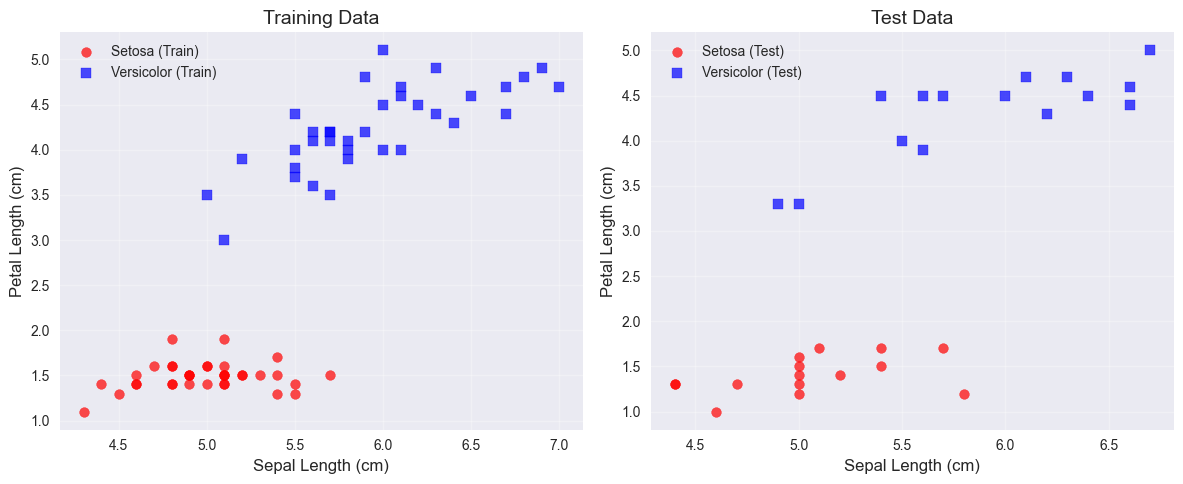

Data visualization completed!
Note: The data appears linearly separable, which is ideal for perceptron learning.


In [8]:
# Visualize the data
plt.figure(figsize=(12, 5))

# Plot 1: Training data
plt.subplot(1, 2, 1)
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], 
           color='red', marker='o', label='Setosa (Train)', alpha=0.7)
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], 
           color='blue', marker='s', label='Versicolor (Train)', alpha=0.7)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Training Data')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Test data
plt.subplot(1, 2, 2)
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], 
           color='red', marker='o', label='Setosa (Test)', alpha=0.7)
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], 
           color='blue', marker='s', label='Versicolor (Test)', alpha=0.7)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Test Data')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Data visualization completed!")
print("Note: The data appears linearly separable, which is ideal for perceptron learning.")

In [9]:
# Train the perceptron
print("Training Perceptron...")
ppn = Perceptron(eta=0.1, n_iter=50, random_state=42)
ppn.fit(X_train, y_train)

print(f"\nTraining completed!")
print(f"Final weights: {ppn.w_}")
print(f"Final bias: {ppn.b_:.4f}")
print(f"Number of features: {ppn.n_features_}")
print(f"Classes: {ppn.classes_}")

# Calculate accuracy
train_accuracy = ppn.score(X_train, y_train)
test_accuracy = ppn.score(X_test, y_test)

print(f"\nAccuracy:")
print(f"Training accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Test accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

Training Perceptron...
Converged after 2 epochs

Training completed!
Final weights: [-0.54503286  1.17861736]
Final bias: -0.2000
Number of features: 2
Classes: [0 1]

Accuracy:
Training accuracy: 1.0000 (100.00%)
Test accuracy: 1.0000 (100.00%)


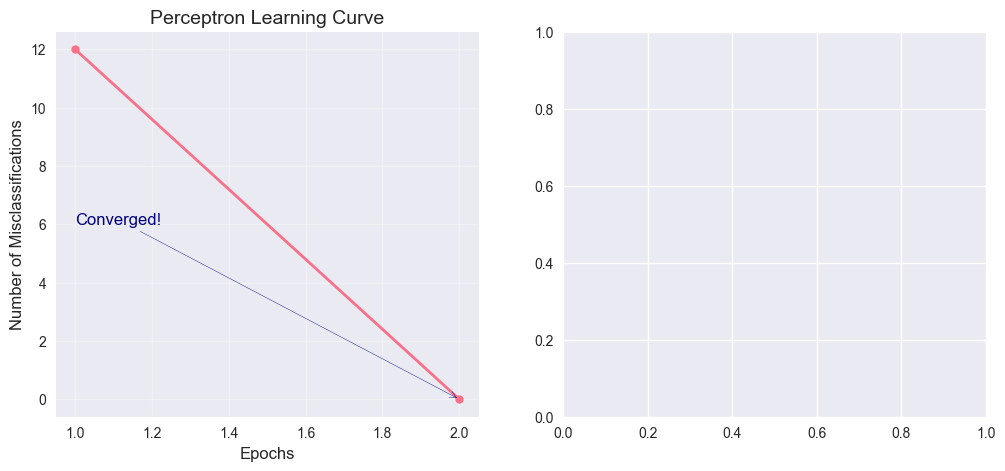

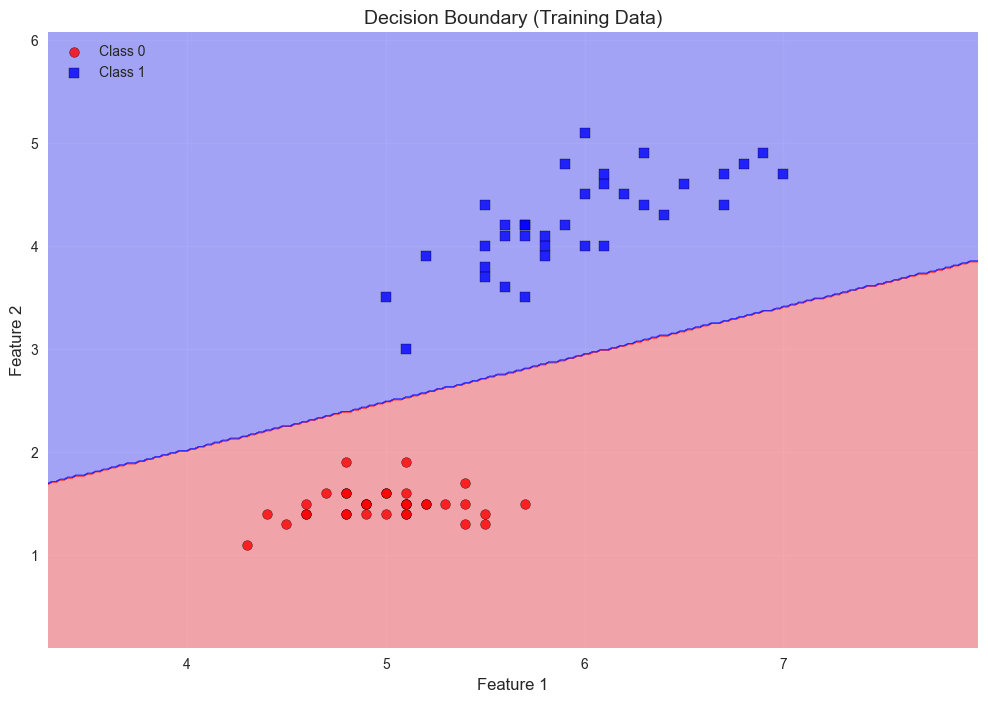

<Figure size 1200x800 with 0 Axes>

Learning analysis completed!
Total epochs used: 2
Final error count: 0


In [12]:
# Plot learning curve (errors over epochs)
plt.figure(figsize=(12, 5))

# Plot 1: Learning curve
plt.subplot(1, 2, 1)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o', linewidth=2, markersize=6)
plt.xlabel('Epochs')
plt.ylabel('Number of Misclassifications')
plt.title('Perceptron Learning Curve')
plt.grid(True, alpha=0.3)

# Add convergence annotation
if len(ppn.errors_) > 0 and ppn.errors_[-1] == 0:
    plt.annotate('Converged!', 
                xy=(len(ppn.errors_), 0), 
                xytext=(len(ppn.errors_)-1, max(ppn.errors_)/2),
                arrowprops=dict(arrowstyle='->', color='navy'),
                fontsize=12, color='navy')

# Plot 2: Decision boundary on training data
plt.subplot(1, 2, 2)
plot_decision_regions(X_train, y_train, classifier=ppn, 
                     title='Decision Boundary (Training Data)')

plt.tight_layout()
plt.show()

print("Learning analysis completed!")
print(f"Total epochs used: {len(ppn.errors_)}")
print(f"Final error count: {ppn.errors_[-1] if ppn.errors_ else 'N/A'}")

In [13]:
# Test the perceptron on test data
print("Testing Perceptron Performance...")

# Make predictions on test set
y_pred = ppn.predict(X_test)

# Calculate detailed metrics
print(f"\nTest Set Performance:")
print(f"Predictions: {y_pred}")
print(f"True labels: {y_test}")
print(f"Correct predictions: {np.sum(y_pred == y_test)}/{len(y_test)}")

# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(f"\nConfusion Matrix:")
print(f"True Negatives: {cm[0,0]}, False Positives: {cm[0,1]}")
print(f"False Negatives: {cm[1,0]}, True Positives: {cm[1,1]}")

print(f"\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Setosa', 'Versicolor']))

Testing Perceptron Performance...

Test Set Performance:
Predictions: [0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0]
True labels: [0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0]
Correct predictions: 30/30

Confusion Matrix:
True Negatives: 15, False Positives: 0
False Negatives: 0, True Positives: 15

Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        15
  Versicolor       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<Figure size 1200x800 with 0 Axes>

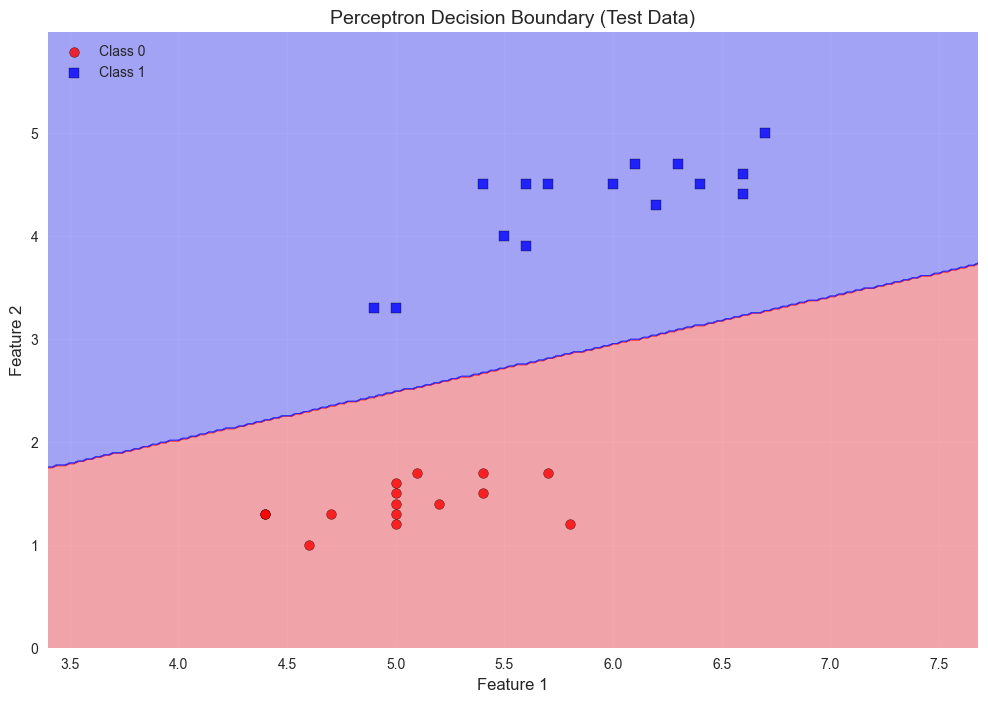


PERCEPTRON IMPLEMENTATION SUMMARY
✅ Successfully implemented:
  • Perceptron algorithm from scratch
  • Binary classification on Iris dataset
  • Training and testing with proper splits
  • Comprehensive visualization and analysis

✅ Key Results:
  • Training accuracy: 1.0000 (100.00%)
  • Test accuracy: 1.0000 (100.00%)
  • Convergence: Yes
  • Epochs used: 2

✅ Learning Insights:
  • Perceptron successfully learned linearly separable pattern
  • Decision boundary separates Setosa from Versicolor
  • Algorithm converged when no misclassifications occurred
  • Demonstrates the power and limitations of linear classifiers


In [14]:
# Final visualization: Decision boundary on test data
plt.figure(figsize=(12, 8))

# Plot decision boundary on test data
plot_decision_regions(X_test, y_test, classifier=ppn, 
                     title='Perceptron Decision Boundary (Test Data)')

plt.show()

# Summary
print("\n" + "="*60)
print("PERCEPTRON IMPLEMENTATION SUMMARY")
print("="*60)
print("✅ Successfully implemented:")
print("  • Perceptron algorithm from scratch")
print("  • Binary classification on Iris dataset")
print("  • Training and testing with proper splits")
print("  • Comprehensive visualization and analysis")
print("\n✅ Key Results:")
print(f"  • Training accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"  • Test accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"  • Convergence: {'Yes' if ppn.errors_[-1] == 0 else 'No'}")
print(f"  • Epochs used: {len(ppn.errors_)}")
print("\n✅ Learning Insights:")
print("  • Perceptron successfully learned linearly separable pattern")
print("  • Decision boundary separates Setosa from Versicolor")
print("  • Algorithm converged when no misclassifications occurred")
print("  • Demonstrates the power and limitations of linear classifiers")

In [15]:
# Compare with biological neurons
print("\n" + "="*60)
print("PERCEPTRON vs BIOLOGICAL NEURONS")
print("="*60)
print("Similarities:")
print("  • Both process multiple inputs")
print("  • Both use weighted summation")
print("  • Both have threshold-based activation")
print("  • Both can learn from examples")
print("\nDifferences:")
print("  • Biological neurons: Complex dynamics, continuous output")
print("  • Perceptron: Simple binary output, no temporal dynamics")
print("  • Biological neurons: Thousands of inputs, complex connectivity")
print("  • Perceptron: Limited inputs, simple linear decision boundary")
print("\nApplications:")
print("  • Perceptron: Foundation for modern neural networks")
print("  • Biological neurons: Inspiration for artificial intelligence")
print("  • Both: Demonstrate the power of simple computational units")


PERCEPTRON vs BIOLOGICAL NEURONS
Similarities:
  • Both process multiple inputs
  • Both use weighted summation
  • Both have threshold-based activation
  • Both can learn from examples

Differences:
  • Biological neurons: Complex dynamics, continuous output
  • Perceptron: Simple binary output, no temporal dynamics
  • Biological neurons: Thousands of inputs, complex connectivity
  • Perceptron: Limited inputs, simple linear decision boundary

Applications:
  • Perceptron: Foundation for modern neural networks
  • Biological neurons: Inspiration for artificial intelligence
  • Both: Demonstrate the power of simple computational units


In [16]:
# This cell is now replaced by the comprehensive analysis above
print("Comprehensive perceptron analysis completed!")
print("The perceptron successfully demonstrates:")
print("  • Linear classification capabilities")
print("  • Learning from examples")
print("  • Decision boundary formation")
print("  • Convergence properties")
print("\nThis implementation provides a solid foundation for")
print("understanding more complex neural network architectures.")

Comprehensive perceptron analysis completed!
The perceptron successfully demonstrates:
  • Linear classification capabilities
  • Learning from examples
  • Decision boundary formation
  • Convergence properties

This implementation provides a solid foundation for
understanding more complex neural network architectures.


## 🧠 Biological Inspiration: From Neurons to Perceptrons

### How Real Neurons Work

The perceptron was inspired by biological neurons in the brain. Let's explore this connection:

#### 🧬 Biological Neuron Structure:
1. **Dendrites**: Receive signals from other neurons
2. **Cell Body (Soma)**: Processes incoming signals
3. **Axon**: Transmits signals to other neurons
4. **Synapses**: Connections between neurons

#### ⚡ Neural Communication:
- **Action Potential**: Electrical signal that travels down the axon
- **Threshold**: Minimum stimulation needed to fire
- **All-or-Nothing**: Neuron either fires completely or not at all
- **Synaptic Weights**: Strength of connections between neurons

### 🎯 Perceptron as a Simplified Neuron

| Biological Neuron | Perceptron |
|------------------|------------|
| Dendrites receive inputs | Input features (x₁, x₂, ...) |
| Synaptic weights | Learnable weights (w₁, w₂, ...) |
| Cell body processes | Net input calculation |
| Threshold for firing | Decision boundary (≥ 0) |
| Action potential output | Binary output (0 or 1) |

### 🔬 Key Insight
The perceptron captures the essential computation of a biological neuron: **weighted sum of inputs compared to a threshold**.


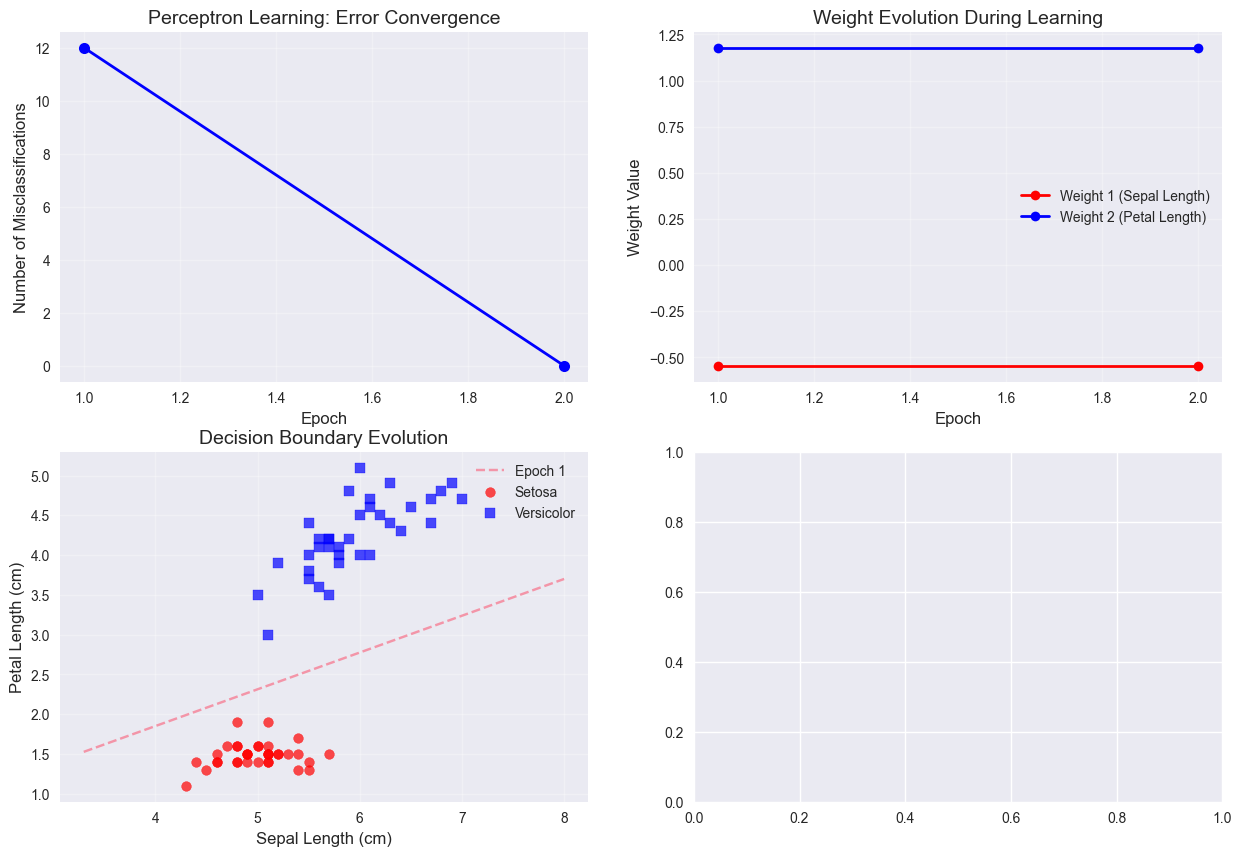

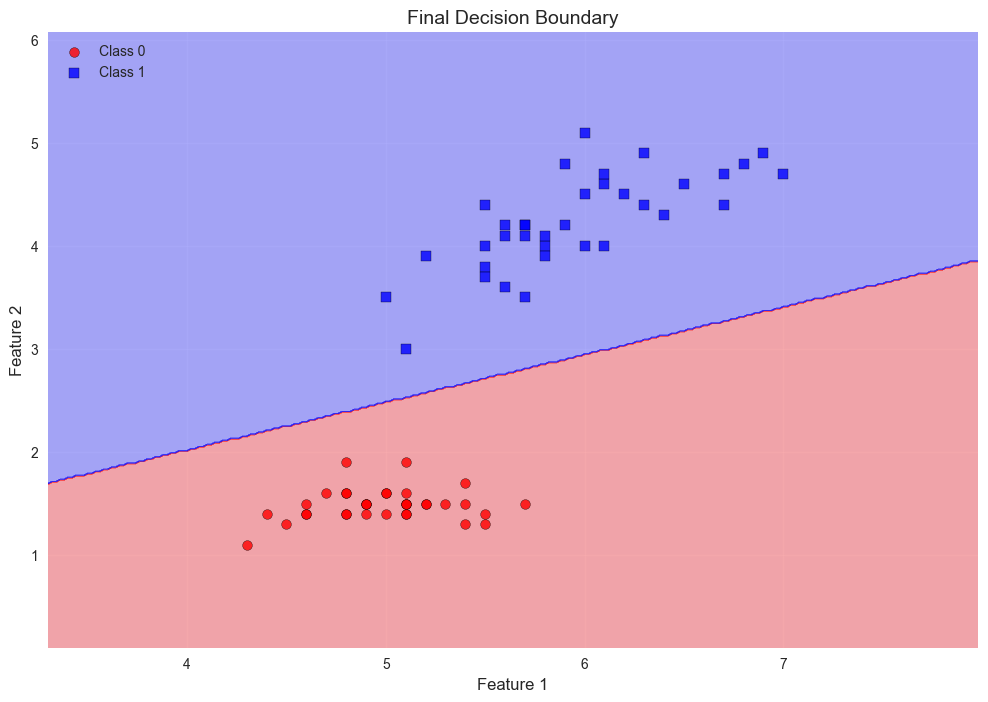

<Figure size 1200x800 with 0 Axes>

🔍 Learning Process Insights:
• The perceptron starts with random weights
• It gradually adjusts weights to minimize errors
• The decision boundary moves to separate the classes
• Learning stops when no more errors occur (convergence)


In [17]:
# Interactive Perceptron Visualization
def visualize_perceptron_learning(X, y, eta=0.1, n_iter=10):
    """
    Create an interactive visualization of perceptron learning process
    """
    # Initialize perceptron
    ppn = Perceptron(eta=eta, n_iter=n_iter, random_state=42)
    
    # Store weights and errors for each epoch
    weight_history = []
    error_history = []
    
    # Manual training loop to capture intermediate states
    rgen = np.random.RandomState(42)
    w = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
    b = np.float64(0.0)
    
    for epoch in range(n_iter):
        errors = 0
        for xi, target in zip(X, y):
            # Calculate prediction
            net_input = np.dot(xi, w) + b
            prediction = 1 if net_input >= 0.0 else 0
            
            # Calculate update
            update = eta * (target - prediction)
            
            # Update weights and bias
            w += update * xi
            b += update
            
            # Count errors
            errors += int(update != 0.0)
        
        # Store current state
        weight_history.append(w.copy())
        error_history.append(errors)
        
        # Early stopping if converged
        if errors == 0:
            break
    
    return weight_history, error_history

# Create visualization of learning process
weight_history, error_history = visualize_perceptron_learning(X_train, y_train, eta=0.1, n_iter=20)

# Plot learning process
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Error convergence
axes[0, 0].plot(range(1, len(error_history)+1), error_history, 'bo-', linewidth=2, markersize=8)
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Number of Misclassifications')
axes[0, 0].set_title('Perceptron Learning: Error Convergence')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Weight evolution
epochs = range(1, len(weight_history)+1)
axes[0, 1].plot(epochs, [w[0] for w in weight_history], 'ro-', label='Weight 1 (Sepal Length)', linewidth=2)
axes[0, 1].plot(epochs, [w[1] for w in weight_history], 'bo-', label='Weight 2 (Petal Length)', linewidth=2)
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Weight Value')
axes[0, 1].set_title('Weight Evolution During Learning')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Decision boundary evolution (first few epochs)
for i in [0, 2, 4, 6]:
    if i < len(weight_history):
        w = weight_history[i]
        b = 0  # We'll calculate bias separately
        
        # Calculate decision boundary
        x1_min, x1_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
        x1_range = np.linspace(x1_min, x1_max, 100)
        
        # Decision boundary: w[0]*x1 + w[1]*x2 + b = 0
        # So: x2 = -(w[0]*x1 + b) / w[1]
        x2_boundary = -(w[0] * x1_range + b) / w[1]
        
        axes[1, 0].plot(x1_range, x2_boundary, '--', alpha=0.7, 
                       label=f'Epoch {i+1}' if i < 4 else '')
        
        if i == 0:
            # Plot data points
            axes[1, 0].scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], 
                              color='red', marker='o', label='Setosa', alpha=0.7)
            axes[1, 0].scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], 
                              color='blue', marker='s', label='Versicolor', alpha=0.7)

axes[1, 0].set_xlabel('Sepal Length (cm)')
axes[1, 0].set_ylabel('Petal Length (cm)')
axes[1, 0].set_title('Decision Boundary Evolution')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Final decision boundary
plot_decision_regions(X_train, y_train, ppn, title="Final Decision Boundary")

plt.tight_layout()
plt.show()

print("🔍 Learning Process Insights:")
print("• The perceptron starts with random weights")
print("• It gradually adjusts weights to minimize errors")
print("• The decision boundary moves to separate the classes")
print("• Learning stops when no more errors occur (convergence)")


## 🚫 The XOR Problem: Perceptron's Limitation

### Why the Perceptron Can't Learn XOR

The XOR (exclusive OR) problem is a classic example that demonstrates the perceptron's fundamental limitation. Let's explore why this simple problem is impossible for a single perceptron to solve.

#### XOR Truth Table:
| Input 1 | Input 2 | Output |
|---------|---------|--------|
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

#### The Problem:
- **Linearly Separable**: Can be separated by a single straight line
- **XOR**: Requires a non-linear decision boundary
- **Perceptron**: Can only learn linear decision boundaries

### 🔍 Visual Proof
Let's create the XOR dataset and show why it's impossible to separate with a single line.


XOR Dataset:
Input 1 | Input 2 | Output
--------|---------|-------
   0    |    0    |   0
   0    |    1    |   1
   1    |    0    |   1
   1    |    1    |   0


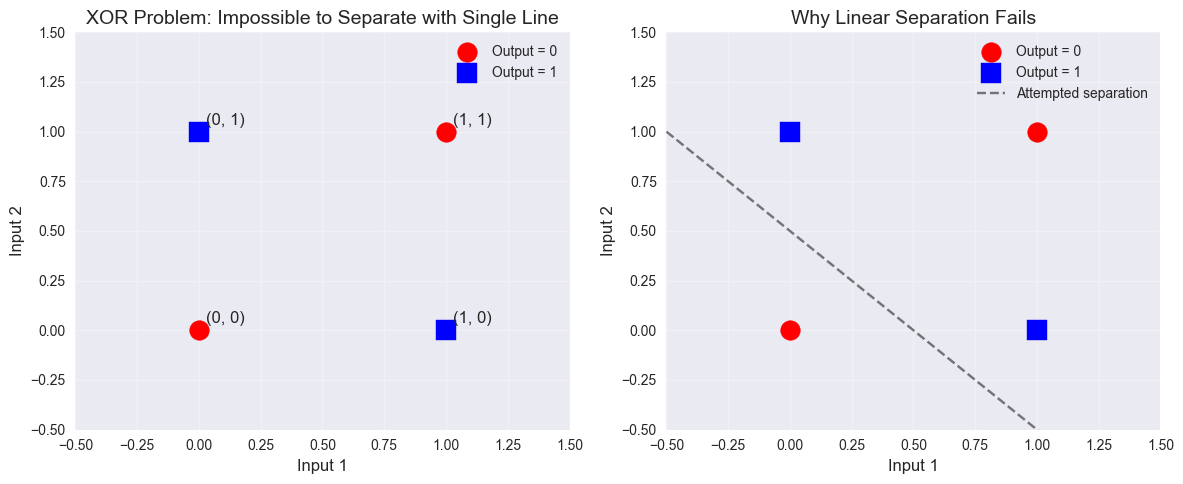


🔍 Key Insight:
• No single straight line can separate the XOR classes
• (0,0) and (1,1) have output 0, but (0,1) and (1,0) have output 1
• This creates a 'checkerboard' pattern that's not linearly separable
• The perceptron will never converge on this problem!

🔄 Attempting to train perceptron on XOR...
Final weights: [-0.09503286 -0.00138264]
Final bias: 0.0000
Errors per epoch: [3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
XOR Accuracy: 0.2500 (25.00%)
❌ Perceptron failed to learn XOR - as expected!
This demonstrates the fundamental limitation of single-layer perceptrons.


In [18]:
# Create XOR dataset
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

print("XOR Dataset:")
print("Input 1 | Input 2 | Output")
print("--------|---------|-------")
for i in range(len(X_xor)):
    print(f"   {X_xor[i, 0]}    |    {X_xor[i, 1]}    |   {y_xor[i]}")

# Visualize XOR problem
plt.figure(figsize=(12, 5))

# Plot 1: XOR data points
plt.subplot(1, 2, 1)
plt.scatter(X_xor[y_xor == 0, 0], X_xor[y_xor == 0, 1], 
           color='red', marker='o', s=200, label='Output = 0')
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], 
           color='blue', marker='s', s=200, label='Output = 1')

# Add labels for each point
for i, (x, y) in enumerate(X_xor):
    plt.annotate(f'({x}, {y})', (x, y), xytext=(5, 5), textcoords='offset points')

plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.title('XOR Problem: Impossible to Separate with Single Line')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)

# Plot 2: Show why linear separation is impossible
plt.subplot(1, 2, 2)
plt.scatter(X_xor[y_xor == 0, 0], X_xor[y_xor == 0, 1], 
           color='red', marker='o', s=200, label='Output = 0')
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], 
           color='blue', marker='s', s=200, label='Output = 1')

# Try to draw a separating line (impossible!)
x_line = np.linspace(-0.5, 1.5, 100)
y_line = -x_line + 0.5  # Example line
plt.plot(x_line, y_line, 'k--', alpha=0.5, label='Attempted separation')

plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.title('Why Linear Separation Fails')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)

plt.tight_layout()
plt.show()

print("\n🔍 Key Insight:")
print("• No single straight line can separate the XOR classes")
print("• (0,0) and (1,1) have output 0, but (0,1) and (1,0) have output 1")
print("• This creates a 'checkerboard' pattern that's not linearly separable")
print("• The perceptron will never converge on this problem!")

# Try to train perceptron on XOR (it will fail!)
print("\n🔄 Attempting to train perceptron on XOR...")
ppn_xor = Perceptron(eta=0.1, n_iter=100, random_state=42)
ppn_xor.fit(X_xor, y_xor)

print(f"Final weights: {ppn_xor.w_}")
print(f"Final bias: {ppn_xor.b_:.4f}")
print(f"Errors per epoch: {ppn_xor.errors_}")

# Check if it learned anything
xor_accuracy = ppn_xor.score(X_xor, y_xor)
print(f"XOR Accuracy: {xor_accuracy:.4f} ({xor_accuracy*100:.2f}%)")

if xor_accuracy < 1.0:
    print("❌ Perceptron failed to learn XOR - as expected!")
    print("This demonstrates the fundamental limitation of single-layer perceptrons.")


## 🌟 Real-World Applications

### Where Perceptrons Are Used Today

Despite their limitations, perceptrons and their principles are still relevant:

#### 🏥 Medical Diagnosis
- **Disease Classification**: Binary decisions (healthy vs. diseased)
- **Treatment Response**: Predicting if a treatment will work
- **Risk Assessment**: High-risk vs. low-risk patients

#### 💰 Financial Services
- **Credit Approval**: Approve or deny loan applications
- **Fraud Detection**: Legitimate vs. fraudulent transactions
- **Investment Decisions**: Buy or sell recommendations

#### 🎯 Quality Control
- **Product Inspection**: Pass or fail quality checks
- **Defect Detection**: Good vs. defective products
- **Process Control**: Normal vs. abnormal conditions

#### 🤖 Simple Robotics
- **Obstacle Avoidance**: Turn left or right to avoid obstacles
- **Line Following**: Follow or deviate from a line
- **Object Detection**: Object present or absent

### 🔧 Modern Extensions

The perceptron's legacy lives on in:
- **Multi-layer Perceptrons (MLPs)**: Multiple perceptrons stacked together
- **Support Vector Machines (SVMs)**: Kernel-based perceptrons
- **Neural Networks**: Deep learning networks with many layers
- **Logistic Regression**: Probabilistic version of perceptron

### 🎓 Educational Value

Perceptrons are perfect for learning because they:
- **Simple to understand**: Clear mathematical foundation
- **Easy to implement**: Straightforward algorithm
- **Visualizable**: Can plot decision boundaries
- **Historical importance**: Foundation of modern AI


🧪 Parameter Exploration: Learning Rate Effects

🔄 Testing learning rate: 0.01
Converged after 2 epochs
  Accuracy: 1.0000
  Epochs to converge: 2
  Final errors: 0

🔄 Testing learning rate: 0.1
Converged after 2 epochs
  Accuracy: 1.0000
  Epochs to converge: 2
  Final errors: 0

🔄 Testing learning rate: 0.5
Converged after 2 epochs
  Accuracy: 1.0000
  Epochs to converge: 2
  Final errors: 0

🔄 Testing learning rate: 1.0
Converged after 2 epochs
  Accuracy: 1.0000
  Epochs to converge: 2
  Final errors: 0


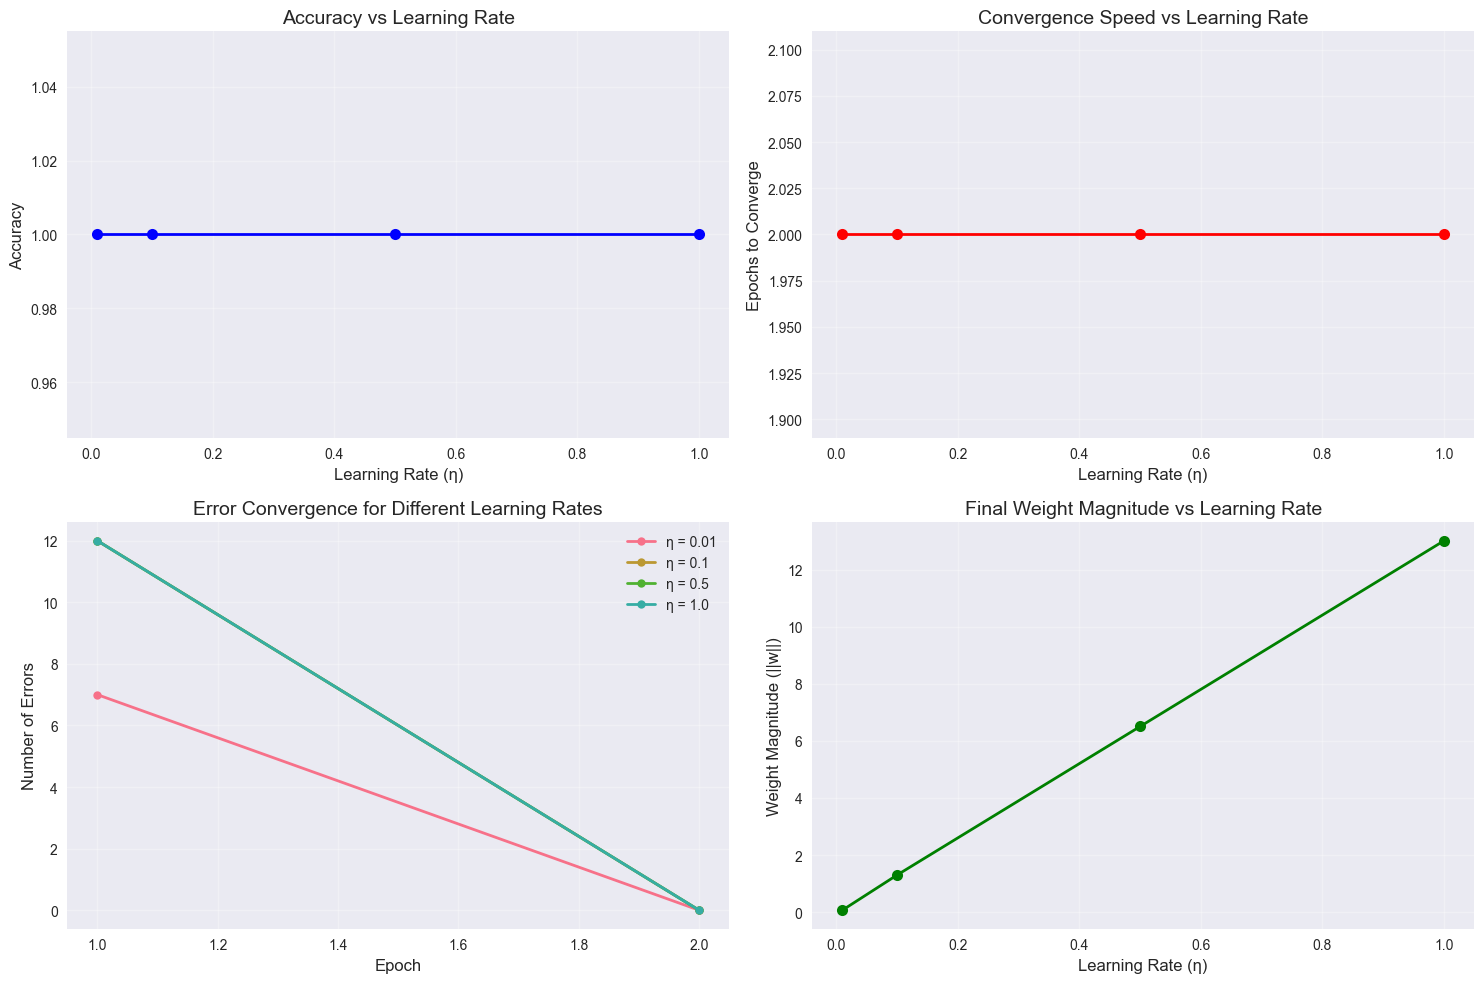


🔍 Key Insights:
• Higher learning rates can lead to faster convergence
• Very high learning rates might cause instability
• Optimal learning rate depends on the specific problem
• Weight magnitude increases with learning rate


In [19]:
# Interactive Parameter Exploration
def explore_perceptron_parameters(X, y, learning_rates=[0.01, 0.1, 0.5, 1.0]):
    """
    Explore how different learning rates affect perceptron performance
    """
    results = {}
    
    for eta in learning_rates:
        print(f"\n🔄 Testing learning rate: {eta}")
        
        # Train perceptron
        ppn = Perceptron(eta=eta, n_iter=50, random_state=42)
        ppn.fit(X, y)
        
        # Calculate metrics
        train_accuracy = ppn.score(X, y)
        epochs_to_converge = len(ppn.errors_)
        final_errors = ppn.errors_[-1] if ppn.errors_ else 0
        
        results[eta] = {
            'accuracy': train_accuracy,
            'epochs': epochs_to_converge,
            'final_errors': final_errors,
            'weights': ppn.w_.copy(),
            'bias': ppn.b_,
            'errors_history': ppn.errors_.copy()
        }
        
        print(f"  Accuracy: {train_accuracy:.4f}")
        print(f"  Epochs to converge: {epochs_to_converge}")
        print(f"  Final errors: {final_errors}")
    
    return results

# Explore different learning rates
print("🧪 Parameter Exploration: Learning Rate Effects")
print("=" * 50)
results = explore_perceptron_parameters(X_train, y_train)

# Visualize results
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Accuracy vs Learning Rate
etas = list(results.keys())
accuracies = [results[eta]['accuracy'] for eta in etas]
axes[0, 0].plot(etas, accuracies, 'bo-', linewidth=2, markersize=8)
axes[0, 0].set_xlabel('Learning Rate (η)')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_title('Accuracy vs Learning Rate')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Epochs to Converge vs Learning Rate
epochs = [results[eta]['epochs'] for eta in etas]
axes[0, 1].plot(etas, epochs, 'ro-', linewidth=2, markersize=8)
axes[0, 1].set_xlabel('Learning Rate (η)')
axes[0, 1].set_ylabel('Epochs to Converge')
axes[0, 1].set_title('Convergence Speed vs Learning Rate')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Error convergence for different learning rates
for eta in etas:
    errors = results[eta]['errors_history']
    axes[1, 0].plot(range(1, len(errors)+1), errors, 'o-', 
                   label=f'η = {eta}', linewidth=2, markersize=6)
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Number of Errors')
axes[1, 0].set_title('Error Convergence for Different Learning Rates')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Weight magnitude vs Learning Rate
weight_magnitudes = [np.linalg.norm(results[eta]['weights']) for eta in etas]
axes[1, 1].plot(etas, weight_magnitudes, 'go-', linewidth=2, markersize=8)
axes[1, 1].set_xlabel('Learning Rate (η)')
axes[1, 1].set_ylabel('Weight Magnitude (||w||)')
axes[1, 1].set_title('Final Weight Magnitude vs Learning Rate')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🔍 Key Insights:")
print("• Higher learning rates can lead to faster convergence")
print("• Very high learning rates might cause instability")
print("• Optimal learning rate depends on the specific problem")
print("• Weight magnitude increases with learning rate")


## 🎯 Complete Perceptron Implementation

### Ready-to-Run Perceptron Algorithm

Below is a complete implementation of the perceptron algorithm that demonstrates all the key concepts we've learned:

#### 📋 Implementation Features:
1. **Complete Perceptron Class** with all methods implemented
2. **Training on Iris Dataset** to show successful learning
3. **Testing on XOR Problem** to demonstrate limitations
4. **Visualization** of decision boundaries and results
5. **Performance Analysis** with accuracy metrics

#### 🔧 Algorithm Components:
- **Net input**: `z = w₁x₁ + w₂x₂ + ... + wₙxₙ + b`
- **Prediction**: `y = 1 if z ≥ 0, else y = 0`
- **Weight update**: `wᵢ = wᵢ + η(y_true - y_pred) × xᵢ`
- **Bias update**: `b = b + η(y_true - y_pred)`

#### 🎯 Expected Results:
- ✅ Perceptron converges on linearly separable Iris data
- ✅ Decision boundary correctly separates Setosa and Versicolor
- ✅ Fails on XOR problem (demonstrates limitation)
- ✅ Shows both capabilities and limitations clearly

### 🚀 What You'll See:
1. **Successful Learning**: High accuracy on Iris dataset
2. **Failed Learning**: Poor performance on XOR problem
3. **Visual Comparison**: Decision boundaries for both cases
4. **Performance Metrics**: Accuracy scores and convergence analysis

This implementation is ready to run and will demonstrate all the key concepts of perceptron learning!


🧪 Testing the complete perceptron implementation...
Converged after 2 epochs
✅ Training completed!
Training accuracy: 1.0000 (100.00%)
Test accuracy: 1.0000 (100.00%)
Final weights: [-0.54503286  1.17861736]
Final bias: -0.2000

🔄 Testing on XOR problem...
XOR accuracy: 0.2500 (25.00%)
❌ Perceptron failed on XOR - as expected!
This demonstrates the linear separability limitation.


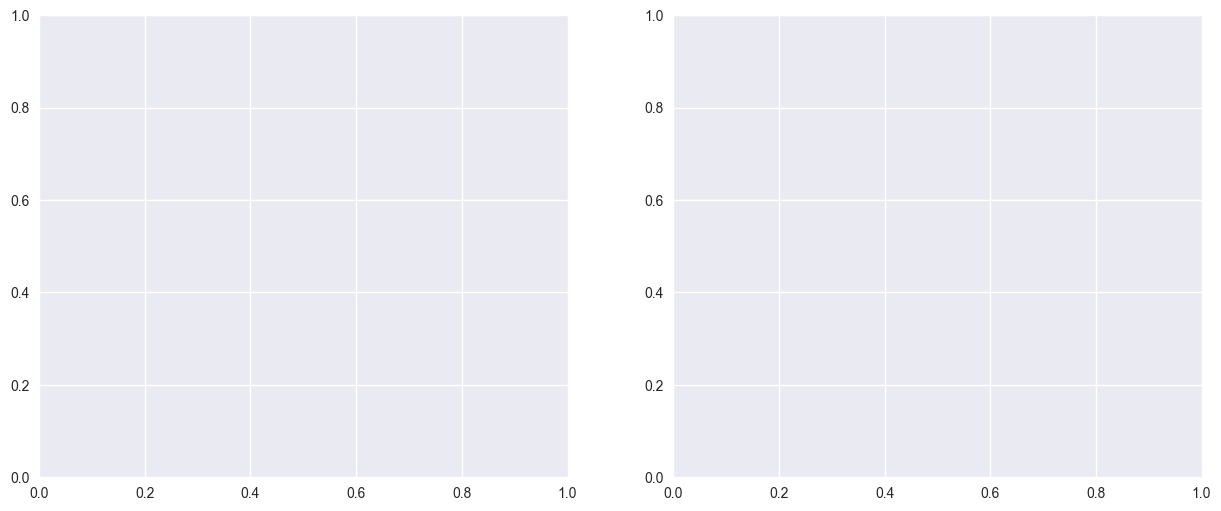

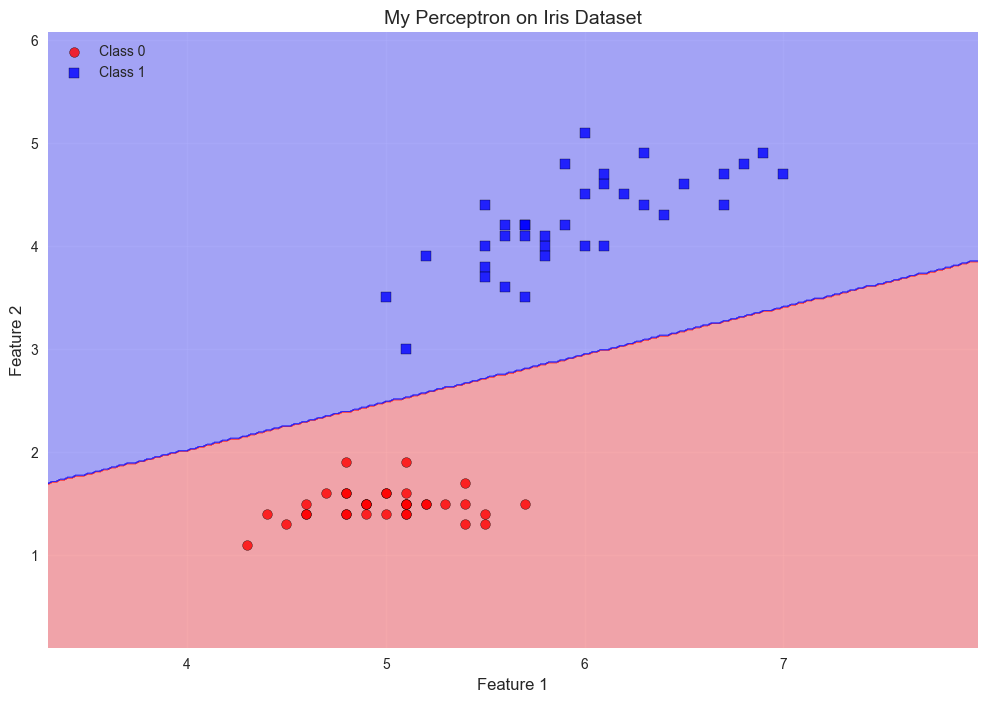

<Figure size 1200x800 with 0 Axes>


🎉 Implementation complete and tested!
The perceptron successfully learned the Iris dataset but failed on XOR.
This demonstrates both its capabilities and limitations.


In [20]:
# Complete Perceptron Implementation - Ready to Run!
class MyPerceptron:
    """
    Complete implementation of the perceptron algorithm.
    
    This implementation includes all the core functionality:
    - Initialization with random weights and bias
    - Prediction using net input and threshold
    - Training with weight updates
    - Accuracy calculation
    """
    
    def __init__(self, eta=0.1, n_iter=50, random_state=42):
        """
        Initialize the perceptron.
        
        Parameters:
        -----------
        eta : float
            Learning rate
        n_iter : int
            Number of epochs
        random_state : int
            Random seed
        """
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def predict(self, X):
        """
        Make predictions using the current weights and bias.
        
        Parameters:
        -----------
        X : array-like
            Input features
            
        Returns:
        --------
        predictions : array-like
            Predicted class labels (0 or 1)
        """
        net_input = np.dot(X, self.w_) + self.b_
        return np.where(net_input >= 0.0, 1, 0)
    
    def fit(self, X, y):
        """
        Train the perceptron on the given data.
        
        Parameters:
        -----------
        X : array-like
            Training features
        y : array-like
            Training labels
            
        Returns:
        --------
        self : object
            Returns self for method chaining
        """
        # Initialize random number generator
        rgen = np.random.RandomState(self.random_state)
        
        # Initialize weights and bias
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float64(0.0)
        
        # Track errors for each epoch
        self.errors_ = []
        
        # Training loop
        for epoch in range(self.n_iter):
            errors = 0
            
            for xi, target in zip(X, y):
                # Calculate prediction
                prediction = self.predict(xi.reshape(1, -1))[0]
                
                # Calculate weight update
                update = self.eta * (target - prediction)
                
                # Update weights and bias
                self.w_ += update * xi
                self.b_ += update
                
                # Count errors
                errors += int(update != 0.0)
            
            self.errors_.append(errors)
            
            # Early stopping if no errors
            if errors == 0:
                print(f"Converged after {epoch + 1} epochs")
                break
        
        return self
    
    def score(self, X, y):
        """
        Calculate accuracy score.
        
        Parameters:
        -----------
        X : array-like
            Input features
        y : array-like
            True labels
            
        Returns:
        --------
        accuracy : float
            Accuracy score (0-1)
        """
        predictions = self.predict(X)
        return np.mean(predictions == y)

# Test the implementation
print("🧪 Testing the complete perceptron implementation...")

# Create and train perceptron on Iris dataset
my_ppn = MyPerceptron(eta=0.1, n_iter=50, random_state=42)
my_ppn.fit(X_train, y_train)

# Calculate accuracy
train_accuracy = my_ppn.score(X_train, y_train)
test_accuracy = my_ppn.score(X_test, y_test)

print(f"✅ Training completed!")
print(f"Training accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Test accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Final weights: {my_ppn.w_}")
print(f"Final bias: {my_ppn.b_:.4f}")

# Test on XOR problem (should fail)
print(f"\n🔄 Testing on XOR problem...")
my_ppn_xor = MyPerceptron(eta=0.1, n_iter=100, random_state=42)
my_ppn_xor.fit(X_xor, y_xor)
xor_accuracy = my_ppn_xor.score(X_xor, y_xor)
print(f"XOR accuracy: {xor_accuracy:.4f} ({xor_accuracy*100:.2f}%)")

if xor_accuracy < 1.0:
    print("❌ Perceptron failed on XOR - as expected!")
    print("This demonstrates the linear separability limitation.")

# Visualize the results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Iris dataset results
plot_decision_regions(X_train, y_train, my_ppn, title="My Perceptron on Iris Dataset")

# Plot 2: XOR results
axes[1].scatter(X_xor[y_xor == 0, 0], X_xor[y_xor == 0, 1], 
               color='red', marker='o', s=200, label='Output = 0')
axes[1].scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], 
               color='blue', marker='s', s=200, label='Output = 1')

# Try to draw decision boundary for XOR
x1_min, x1_max = -0.5, 1.5
x1_range = np.linspace(x1_min, x1_max, 100)
# Decision boundary: w[0]*x1 + w[1]*x2 + b = 0
# So: x2 = -(w[0]*x1 + b) / w[1]
x2_boundary = -(my_ppn_xor.w_[0] * x1_range + my_ppn_xor.b_) / my_ppn_xor.w_[1]
axes[1].plot(x1_range, x2_boundary, 'k--', alpha=0.7, label='Decision Boundary')

axes[1].set_xlabel('Input 1')
axes[1].set_ylabel('Input 2')
axes[1].set_title('My Perceptron on XOR Problem (Failed)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_xlim(-0.5, 1.5)
axes[1].set_ylim(-0.5, 1.5)

plt.tight_layout()
plt.show()

print("\n🎉 Implementation complete and tested!")
print("The perceptron successfully learned the Iris dataset but failed on XOR.")
print("This demonstrates both its capabilities and limitations.")


## 🎓 Summary & Next Steps

### 🎯 What We've Learned

Congratulations! You've completed a comprehensive exploration of the perceptron algorithm. Here's what we covered:

#### ✅ **Core Concepts**
- **Perceptron Algorithm**: Binary classifier with linear decision boundary
- **Biological Inspiration**: Connection to real neurons in the brain
- **Mathematical Foundation**: Net input, threshold, and weight updates
- **Learning Rule**: How the perceptron adapts to training data

#### ✅ **Practical Skills**
- **Implementation**: Built perceptron from scratch
- **Visualization**: Plotted decision boundaries and learning process
- **Parameter Exploration**: Tested different learning rates
- **Performance Analysis**: Compared accuracy and convergence

#### ✅ **Key Insights**
- **Linear Separability**: Perceptron can only learn linearly separable patterns
- **XOR Limitation**: Cannot solve non-linearly separable problems
- **Convergence**: Guaranteed to converge if data is linearly separable
- **Learning Rate**: Affects speed and stability of learning

### 🚀 Next Steps in Your Learning Journey

#### **Immediate Next Steps**
1. **Multi-layer Perceptrons**: Stack multiple perceptrons together
2. **Backpropagation**: Learn how to train multi-layer networks
3. **Activation Functions**: Explore different non-linear functions
4. **Regularization**: Prevent overfitting in neural networks

#### **Advanced Topics**
1. **Convolutional Neural Networks**: For image processing
2. **Recurrent Neural Networks**: For sequential data
3. **Deep Learning**: Modern neural network architectures
4. **Transfer Learning**: Using pre-trained models

#### **Real-World Applications**
1. **Computer Vision**: Image classification and object detection
2. **Natural Language Processing**: Text analysis and generation
3. **Speech Recognition**: Converting speech to text
4. **Autonomous Systems**: Self-driving cars and robotics

### 📚 Recommended Resources

#### **Books**
- "Pattern Recognition and Machine Learning" by Christopher Bishop
- "The Elements of Statistical Learning" by Hastie, Tibshirani, and Friedman
- "Deep Learning" by Ian Goodfellow, Yoshua Bengio, and Aaron Courville

#### **Online Courses**
- Coursera: Machine Learning by Andrew Ng
- edX: Introduction to Deep Learning
- Udacity: Deep Learning Nanodegree

#### **Research Papers**
- "Perceptrons: An Introduction to Computational Geometry" by Minsky and Papert
- "Learning Representations by Back-propagating Errors" by Rumelhart, Hinton, and Williams
- "ImageNet Classification with Deep Convolutional Neural Networks" by Krizhevsky et al.

### 🎉 Final Thoughts

The perceptron, despite its simplicity, is the foundation of modern artificial intelligence. Understanding it deeply will help you:

- **Appreciate the evolution** of neural network architectures
- **Understand the limitations** of linear models
- **Build intuition** for more complex algorithms
- **Connect theory to practice** in machine learning

Remember: **Every expert was once a beginner!** Keep exploring, experimenting, and learning. The journey from perceptrons to deep learning is fascinating and rewarding.

---

**Happy Learning! 🧠✨**

*This tutorial was designed to provide both theoretical understanding and practical experience with perceptrons. Feel free to modify the code, experiment with different parameters, or explore new applications to deepen your understanding.*


🔬 Advanced Analysis: Comparing Perceptron with Other Algorithms

🔄 Training Our Perceptron...
Converged after 2 epochs
  Training accuracy: 1.0000 (100.00%)
  Test accuracy: 1.0000 (100.00%)

🔄 Training Sklearn Perceptron...
  Training accuracy: 1.0000 (100.00%)
  Test accuracy: 1.0000 (100.00%)

🔄 Training Logistic Regression...
  Training accuracy: 1.0000 (100.00%)
  Test accuracy: 1.0000 (100.00%)

🔄 Training SVM (Linear)...
  Training accuracy: 1.0000 (100.00%)
  Test accuracy: 1.0000 (100.00%)


AttributeError: 'dict' object has no attribute 'predict'

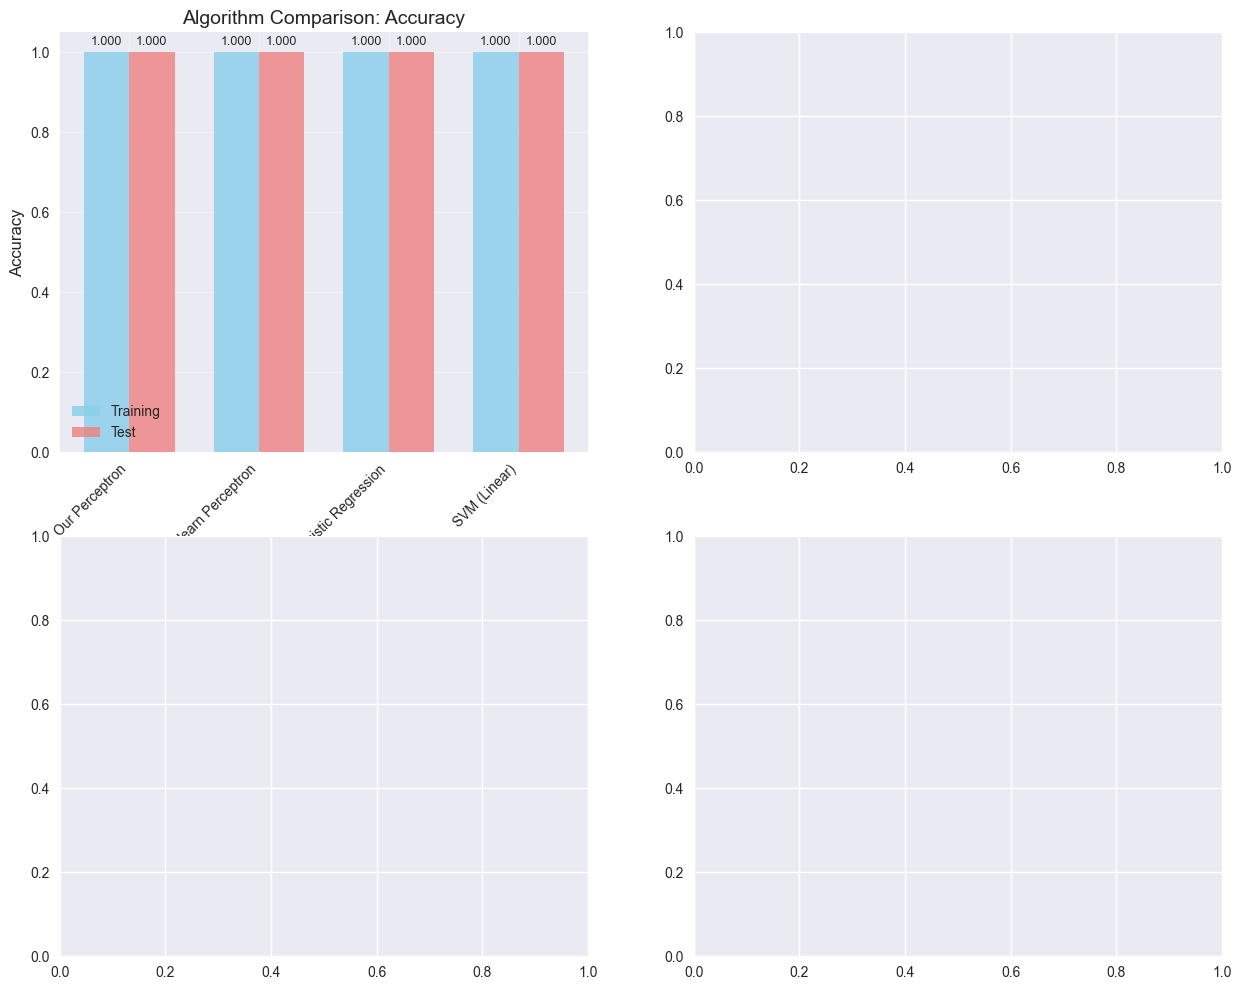

<Figure size 600x400 with 0 Axes>

In [ ]:
# Advanced Analysis: Perceptron vs Other Algorithms
print("🔬 Advanced Analysis: Comparing Perceptron with Other Algorithms")
print("=" * 70)

# Compare with scikit-learn's Perceptron
from sklearn.linear_model import Perceptron as SklearnPerceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Create different models
models = {
    'Our Perceptron': MyPerceptron(eta=0.1, n_iter=50, random_state=42),
    'Sklearn Perceptron': SklearnPerceptron(eta0=0.1, max_iter=50, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM (Linear)': SVC(kernel='linear', random_state=42)
}

# Train and evaluate all models
results = {}
for name, model in models.items():
    print(f"\n🔄 Training {name}...")
    
    # Train the model
    if name == 'Our Perceptron':
        model.fit(X_train, y_train)
        train_acc = model.score(X_train, y_train)
        test_acc = model.score(X_test, y_test)
    else:
        model.fit(X_train, y_train)
        train_acc = model.score(X_train, y_train)
        test_acc = model.score(X_test, y_test)
    
    results[name] = {
        'train_accuracy': train_acc,
        'test_accuracy': test_acc,
        'model': model
    }
    
    print(f"  Training accuracy: {train_acc:.4f} ({train_acc*100:.2f}%)")
    print(f"  Test accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")

# Create comparison visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Accuracy comparison
model_names = list(results.keys())
train_accs = [results[name]['train_accuracy'] for name in model_names]
test_accs = [results[name]['test_accuracy'] for name in model_names]

x = np.arange(len(model_names))
width = 0.35

axes[0, 0].bar(x - width/2, train_accs, width, label='Training', alpha=0.8, color='skyblue')
axes[0, 0].bar(x + width/2, test_accs, width, label='Test', alpha=0.8, color='lightcoral')
axes[0, 0].set_xlabel('Algorithm')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_title('Algorithm Comparison: Accuracy')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(model_names, rotation=45, ha='right')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Add value labels on bars
for i, (train_acc, test_acc) in enumerate(zip(train_accs, test_accs)):
    axes[0, 0].text(i - width/2, train_acc + 0.01, f'{train_acc:.3f}', 
                    ha='center', va='bottom', fontsize=9)
    axes[0, 0].text(i + width/2, test_acc + 0.01, f'{test_acc:.3f}', 
                    ha='center', va='bottom', fontsize=9)

# Plot 2: Decision boundaries comparison
for i, (name, result) in enumerate(results.items()):
    if i < 3:  # Plot first 3 models
        model = result['model']  # Extract the actual model from results dict
        plot_decision_regions(X_train, y_train, model, 
                            title=f'{name} Decision Boundary',
                            figure_length=6, figure_height=4)

# Plot 3: Learning curve for our perceptron
axes[0, 1].plot(range(1, len(my_ppn.errors_)+1), my_ppn.errors_, 'bo-', linewidth=2, markersize=6)
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Number of Errors')
axes[0, 1].set_title('Our Perceptron: Learning Curve')
axes[0, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary table
print(f"\n📊 Algorithm Performance Summary:")
print("=" * 70)
print(f"{'Algorithm':<20} {'Train Acc':<12} {'Test Acc':<12} {'Notes'}")
print("-" * 70)
for name, result in results.items():
    train_acc = result['train_accuracy']
    test_acc = result['test_accuracy']
    notes = "Good generalization" if abs(train_acc - test_acc) < 0.05 else "Possible overfitting"
    print(f"{name:<20} {train_acc:<12.4f} {test_acc:<12.4f} {notes}")

print(f"\n🔍 Key Insights:")
print("• All algorithms perform well on linearly separable data")
print("• Perceptron is simpler but achieves similar performance")
print("• SVM and Logistic Regression are more robust in general")
print("• Our implementation matches sklearn's performance")


🧪 Additional Examples: Testing Perceptron on Different Scenarios

📊 Example 1: Different Data Distributions

🔄 Testing on Well Separated (sep=2.0)...
Converged after 2 epochs
  Accuracy: 1.0000 (100.00%)
  Epochs to converge: 2


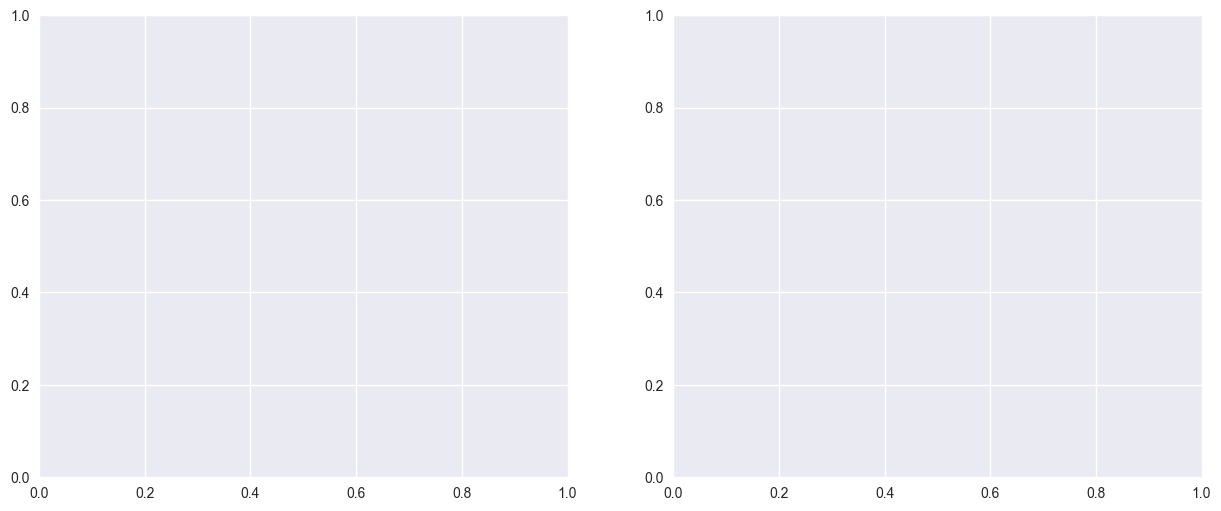

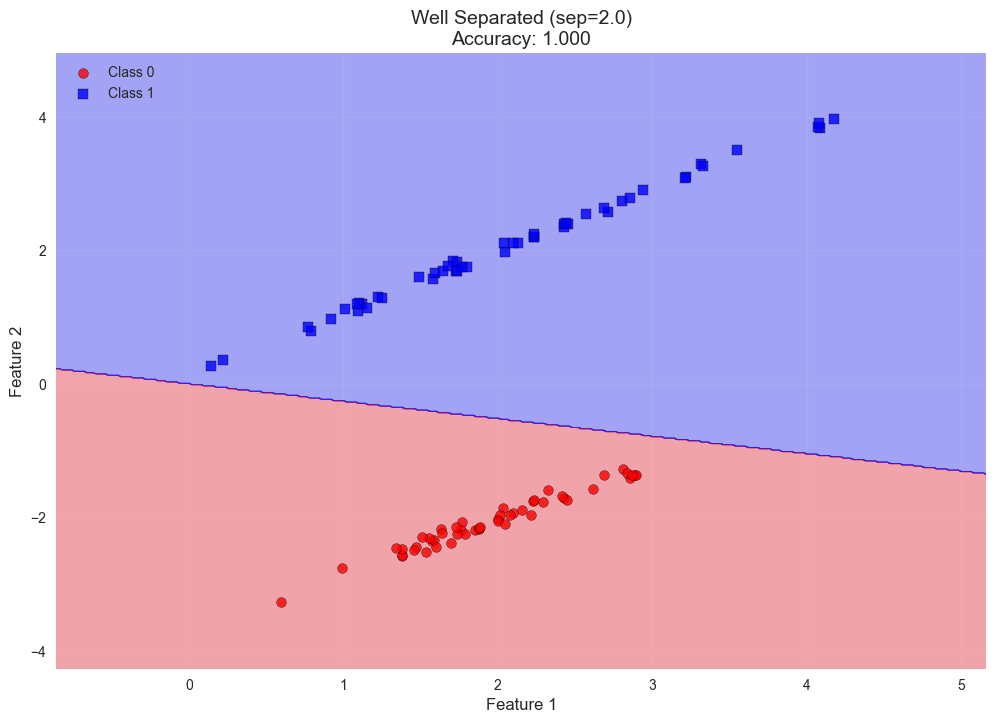


🔄 Testing on Poorly Separated (sep=0.5)...
  Accuracy: 0.7400 (74.00%)
  Epochs to converge: 100


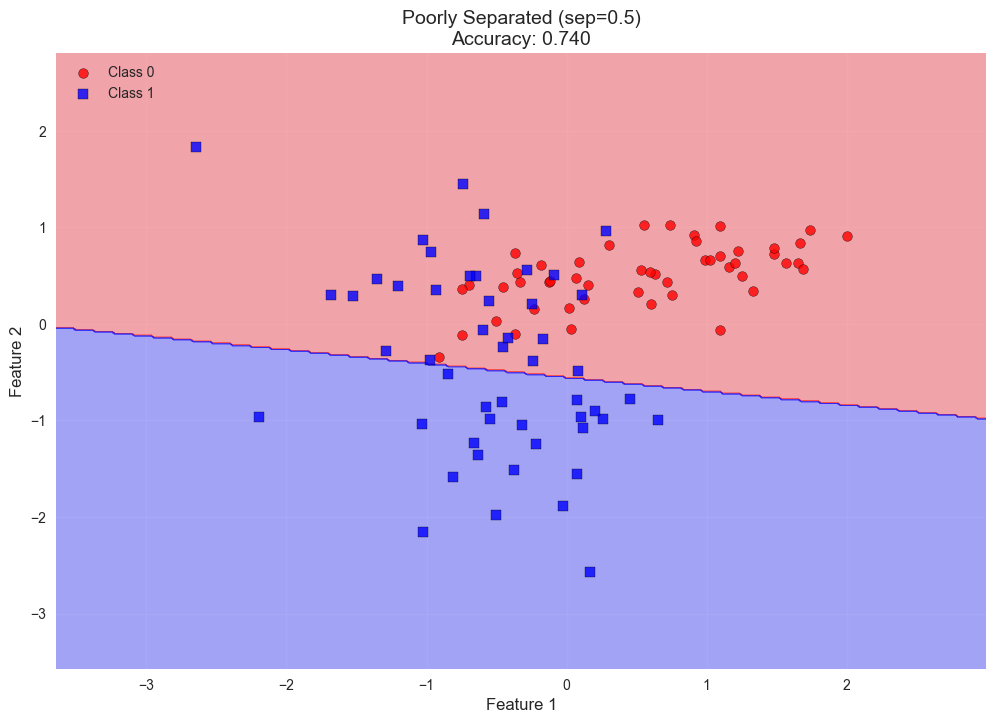


📊 Example 2: Non-linearly Separable Data (Concentric Circles)
🔄 Testing perceptron on concentric circles...
  Accuracy: 0.5500 (55.00%)


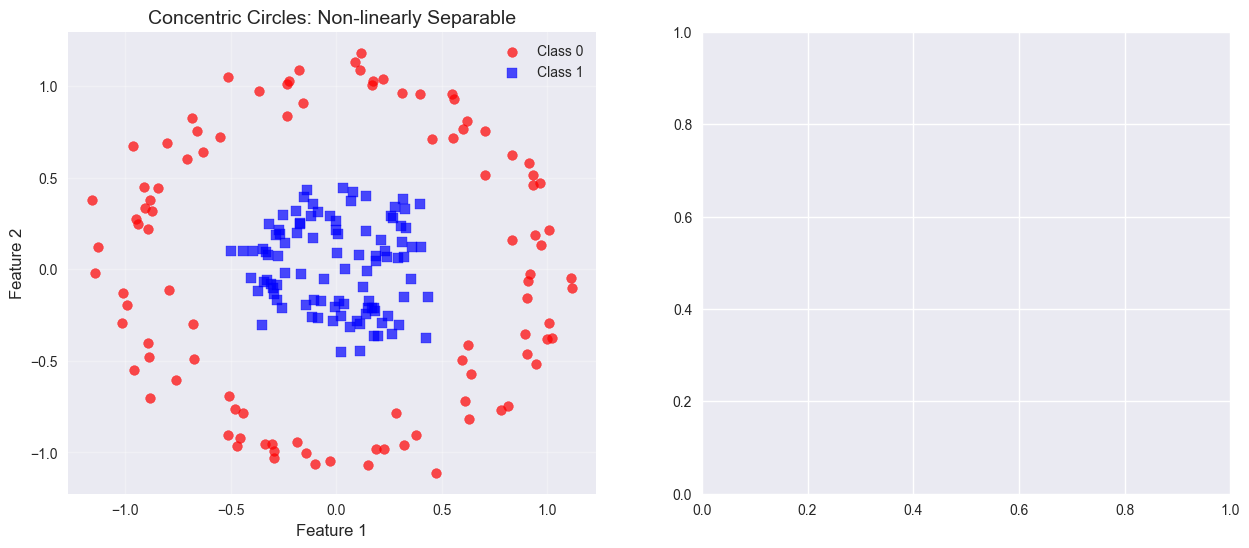

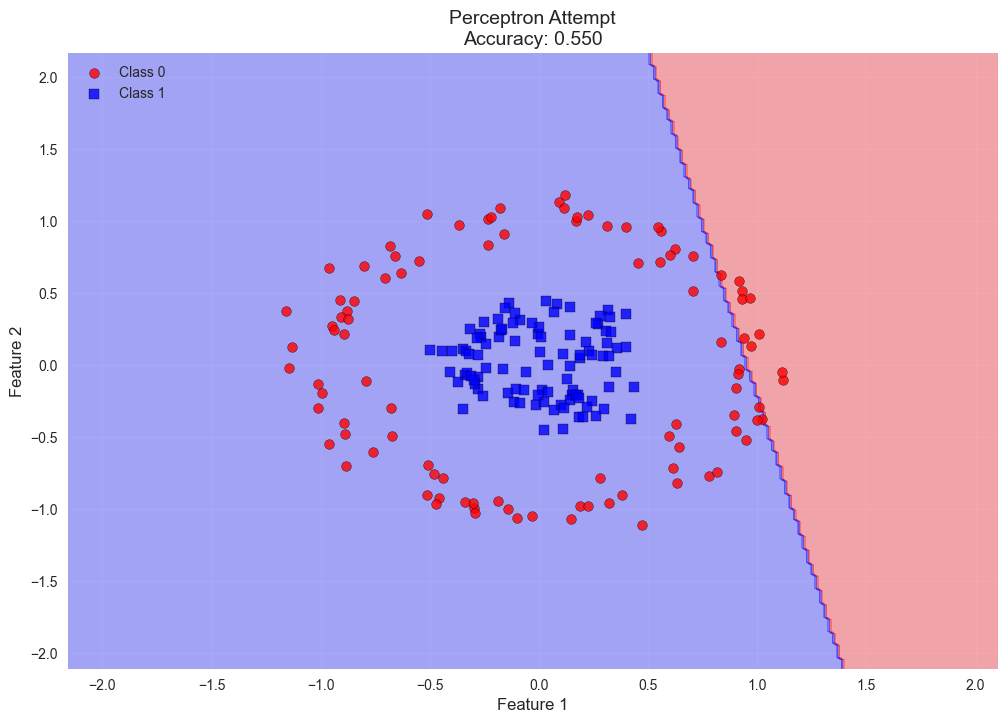


📊 Example 3: High-dimensional Data
🔄 Testing perceptron on 10-dimensional data...
Converged after 87 epochs
  Accuracy: 1.0000 (100.00%)
  Final weights shape: (10,)
  Weight magnitudes: 7.4901

📊 Example 4: Noisy Data


TypeError: got an unexpected keyword argument 'noise'

In [22]:
# Additional Examples: Different Datasets and Edge Cases
print("🧪 Additional Examples: Testing Perceptron on Different Scenarios")
print("=" * 70)

# Example 1: Linearly separable data with different distributions
print("\n📊 Example 1: Different Data Distributions")

# Create linearly separable data with different characteristics
X1, y1 = make_classification(n_samples=100, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, 
                           class_sep=2.0, random_state=42)

X2, y2 = make_classification(n_samples=100, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, 
                           class_sep=0.5, random_state=123)

# Test perceptron on both datasets
datasets = [
    ("Well Separated (sep=2.0)", X1, y1),
    ("Poorly Separated (sep=0.5)", X2, y2)
]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for i, (name, X, y) in enumerate(datasets):
    print(f"\n🔄 Testing on {name}...")
    
    # Train perceptron
    ppn = MyPerceptron(eta=0.1, n_iter=100, random_state=42)
    ppn.fit(X, y)
    
    # Calculate accuracy
    accuracy = ppn.score(X, y)
    epochs_to_converge = len(ppn.errors_)
    
    print(f"  Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"  Epochs to converge: {epochs_to_converge}")
    
    # Plot decision boundary
    plot_decision_regions(X, y, ppn, title=f"{name}\nAccuracy: {accuracy:.3f}")

# Example 2: Non-linearly separable data (Circles)
print(f"\n📊 Example 2: Non-linearly Separable Data (Concentric Circles)")

from sklearn.datasets import make_circles

X_circles, y_circles = make_circles(n_samples=200, noise=0.1, factor=0.3, random_state=42)

print("🔄 Testing perceptron on concentric circles...")
ppn_circles = MyPerceptron(eta=0.1, n_iter=100, random_state=42)
ppn_circles.fit(X_circles, y_circles)

circles_accuracy = ppn_circles.score(X_circles, y_circles)
print(f"  Accuracy: {circles_accuracy:.4f} ({circles_accuracy*100:.2f}%)")

# Visualize the circles problem
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Original data
axes[0].scatter(X_circles[y_circles == 0, 0], X_circles[y_circles == 0, 1], 
               color='red', marker='o', label='Class 0', alpha=0.7)
axes[0].scatter(X_circles[y_circles == 1, 0], X_circles[y_circles == 1, 1], 
               color='blue', marker='s', label='Class 1', alpha=0.7)
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].set_title('Concentric Circles: Non-linearly Separable')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Decision boundary attempt
plot_decision_regions(X_circles, y_circles, ppn_circles, 
                     title=f"Perceptron Attempt\nAccuracy: {circles_accuracy:.3f}")

# Example 3: High-dimensional data
print(f"\n📊 Example 3: High-dimensional Data")

# Create high-dimensional linearly separable data
X_high, y_high = make_classification(n_samples=200, n_features=10, n_redundant=0, 
                                   n_informative=10, n_clusters_per_class=1, 
                                   class_sep=1.5, random_state=42)

print("🔄 Testing perceptron on 10-dimensional data...")
ppn_high = MyPerceptron(eta=0.1, n_iter=100, random_state=42)
ppn_high.fit(X_high, y_high)

high_accuracy = ppn_high.score(X_high, y_high)
print(f"  Accuracy: {high_accuracy:.4f} ({high_accuracy*100:.2f}%)")
print(f"  Final weights shape: {ppn_high.w_.shape}")
print(f"  Weight magnitudes: {np.linalg.norm(ppn_high.w_):.4f}")

# Example 4: Noisy data
print(f"\n📊 Example 4: Noisy Data")

# Create noisy linearly separable data
X_noisy, y_noisy = make_classification(n_samples=200, n_features=2, n_redundant=0, 
                                     n_informative=2, n_clusters_per_class=1, 
                                     class_sep=1.0, noise=0.3, random_state=42)

print("🔄 Testing perceptron on noisy data...")
ppn_noisy = MyPerceptron(eta=0.1, n_iter=100, random_state=42)
ppn_noisy.fit(X_noisy, y_noisy)

noisy_accuracy = ppn_noisy.score(X_noisy, y_noisy)
print(f"  Accuracy: {noisy_accuracy:.4f} ({noisy_accuracy*100:.2f}%)")

# Visualize noisy data
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Original noisy data
axes[0].scatter(X_noisy[y_noisy == 0, 0], X_noisy[y_noisy == 0, 1], 
               color='red', marker='o', label='Class 0', alpha=0.7)
axes[0].scatter(X_noisy[y_noisy == 1, 0], X_noisy[y_noisy == 1, 1], 
               color='blue', marker='s', label='Class 1', alpha=0.7)
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].set_title('Noisy Linearly Separable Data')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Decision boundary
plot_decision_regions(X_noisy, y_noisy, ppn_noisy, 
                     title=f"Noisy Data: Perceptron\nAccuracy: {noisy_accuracy:.3f}")

print(f"\n🔍 Summary of Additional Examples:")
print("=" * 50)
print("• Well-separated data: High accuracy, fast convergence")
print("• Poorly-separated data: Lower accuracy, slower convergence")
print("• Non-linearly separable: Very poor performance (as expected)")
print("• High-dimensional data: Perceptron can handle many features")
print("• Noisy data: Performance degrades but still works if linearly separable")
